# DBSCAN Clustering Analysis

## 1. Data Loading and Exploration

We start by loading the income dataset and exploring its structure. This dataset contains information about individuals including their names, ages, and income levels - the same data we used for hierarchical clustering.


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_excel("income.xlsx", names=["name","age","income"])
df

,name,age,income
0,Rob,29,45
1,Andrea,50,80
2,Mohan,35,52
3,Michael,32,41
4,Kory,36,87
5,David,48,68
6,Ismail,31,80
7,Sheela,55,60


## 2. Initial Data Visualization

We create a scatter plot to visualize the relationship between age and income before applying DBSCAN clustering. This helps us understand the natural distribution of our data points.


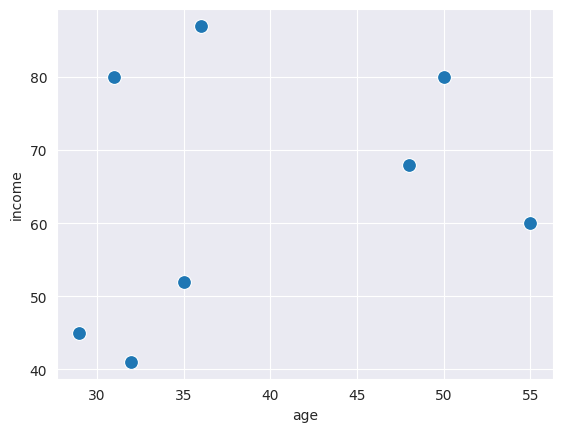

In [2]:
sns.scatterplot(df, x='age', y='income', s=100)
plt.show()

## 3. DBSCAN Clustering Implementation

### Understanding DBSCAN Parameters

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) requires two key parameters:

- **eps=10**: The maximum distance between two samples for them to be considered neighbors
- **min_samples=2**: The minimum number of samples in a neighborhood for a point to be considered a core point

DBSCAN works by:
1. Finding core points (points with at least `min_samples` neighbors within `eps` distance)
2. Forming clusters by connecting core points and their neighbors
3. Marking isolated points as noise (label = -1)


In [3]:
from sklearn.cluster import DBSCAN

ds = DBSCAN(eps=10, min_samples=2)
ds.fit(df[['age', 'income']])
ds.labels_

array([ 0, -1,  0,  0,  1, -1,  1, -1])

## 4. Adding Cluster Labels to Dataset

We add the cluster assignments back to our dataframe. Notice that DBSCAN can identify noise points (outliers) which are labeled as -1. This is a key advantage of DBSCAN over other clustering methods.


In [4]:
df["cluster"] = ds.labels_
df

,name,age,income,cluster
0,Rob,29,45,0
1,Andrea,50,80,-1
2,Mohan,35,52,0
3,Michael,32,41,0
4,Kory,36,87,1
5,David,48,68,-1
6,Ismail,31,80,1
7,Sheela,55,60,-1


## 5. Visualizing DBSCAN Results

The colored scatter plot shows how DBSCAN has grouped our data:
- Different colors represent different clusters
- Points labeled as -1 (noise/outliers) are shown in a distinct color
- DBSCAN automatically determines the number of clusters based on data density

**Key Advantages of DBSCAN:**
- Can find clusters of arbitrary shape
- Automatically identifies outliers/noise
- Doesn't require pre-specifying the number of clusters
- Robust to outliers


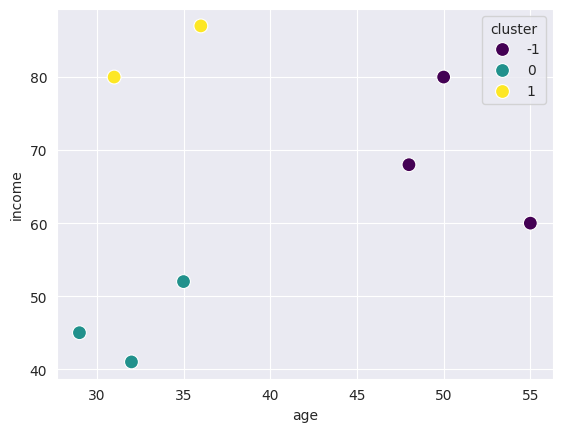

In [5]:
sns.scatterplot(df, x='age', y='income',  palette='viridis', s=100, hue="cluster")
plt.show()